# Task 1: Data Exploration


**Task 1a**


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [91]:
live_df = pd.read_csv('live1.csv')

live_df.head()



,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Asses,Stocks,1961,Head,1300000.0
1,Afghanistan,Asses,Stocks,1962,Head,851850.0
2,Afghanistan,Asses,Stocks,1963,Head,1001112.0
3,Afghanistan,Asses,Stocks,1964,Head,1150000.0
4,Afghanistan,Asses,Stocks,1965,Head,1300000.0


In [92]:
display(live_df)

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Asses,Stocks,1961,Head,1300000.0
1,Afghanistan,Asses,Stocks,1962,Head,851850.0
2,Afghanistan,Asses,Stocks,1963,Head,1001112.0
3,Afghanistan,Asses,Stocks,1964,Head,1150000.0
4,Afghanistan,Asses,Stocks,1965,Head,1300000.0
...,...,...,...,...,...,...
122453,Net Food Importing Developing Countries,Sheep,Stocks,2016,Head,364166482.0
122454,Net Food Importing Developing Countries,Sheep,Stocks,2017,Head,371357850.0
122455,Net Food Importing Developing Countries,Sheep,Stocks,2018,Head,377303293.0
122456,Net Food Importing Developing Countries,Sheep,Stocks,2019,Head,397970957.0


In [93]:
live_df.describe()

,Year,Value
count,122458.000000,1.201940e+05
mean,1991.376439,1.035597e+07
std,17.260431,5.869386e+07
min,1961.000000,0.000000e+00
25%,1976.000000,5.300000e+03
50%,1992.000000,1.021735e+05
75%,2006.000000,1.561571e+06
max,2020.000000,1.525939e+09


In [94]:
live_df.info()
live_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122458 entries, 0 to 122457
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Area     122458 non-null  object 
 1   Item     122458 non-null  object 
 2   Element  122458 non-null  object 
 3   Year     122458 non-null  int64  
 4   Unit     122458 non-null  object 
 5   Value    120194 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ MB


Area          0
Item          0
Element       0
Year          0
Unit          0
Value      2264
dtype: int64

In [95]:
live_df.nunique()

Area         243
Item          14
Element        1
Year          60
Unit           3
Value      61412
dtype: int64

**Task 1b**


In [96]:
mssing_values = live_df.isnull().sum()
print(mssing_values)

Area          0
Item          0
Element       0
Year          0
Unit          0
Value      2264
dtype: int64


# Task 2: Data Cleaning

Since we have few null-values and a lot of data, we remove all null-values.


In [97]:
from scipy.stats import skew

# Drop missing values temporarily to calculate skewness on existing data
value_column = live_df['Value'].dropna()

# Calculate skewness
value_skewness = skew(value_column)
value_skewness

12.842938989069237

In [98]:
# Fill missing values in the 'Value' column with the median of the column
median_value = value_column.median()
live_df['Value'].fillna(median_value, inplace=True)


/var/folders/ck/8xwmm90514l1sr_h8_6dtvyh0000gn/T/ipykernel_71313/3304120988.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  live_df['Value'].fillna(median_value, inplace=True)


In [99]:
#Kommenterer ut dropping av missing values
# live_df = live_df.dropna()


In [100]:
live_df.isnull().sum()

Area       0
Item       0
Element    0
Year       0
Unit       0
Value      0
dtype: int64

In [101]:
display(live_df)

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Asses,Stocks,1961,Head,1300000.0
1,Afghanistan,Asses,Stocks,1962,Head,851850.0
2,Afghanistan,Asses,Stocks,1963,Head,1001112.0
3,Afghanistan,Asses,Stocks,1964,Head,1150000.0
4,Afghanistan,Asses,Stocks,1965,Head,1300000.0
...,...,...,...,...,...,...
122453,Net Food Importing Developing Countries,Sheep,Stocks,2016,Head,364166482.0
122454,Net Food Importing Developing Countries,Sheep,Stocks,2017,Head,371357850.0
122455,Net Food Importing Developing Countries,Sheep,Stocks,2018,Head,377303293.0
122456,Net Food Importing Developing Countries,Sheep,Stocks,2019,Head,397970957.0


In [102]:

live_df = live_df.drop_duplicates(subset = None, keep = 'first')



In [103]:
print(type(live_df))
display(live_df)

<class 'pandas.core.frame.DataFrame'>


,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Asses,Stocks,1961,Head,1300000.0
1,Afghanistan,Asses,Stocks,1962,Head,851850.0
2,Afghanistan,Asses,Stocks,1963,Head,1001112.0
3,Afghanistan,Asses,Stocks,1964,Head,1150000.0
4,Afghanistan,Asses,Stocks,1965,Head,1300000.0
...,...,...,...,...,...,...
122453,Net Food Importing Developing Countries,Sheep,Stocks,2016,Head,364166482.0
122454,Net Food Importing Developing Countries,Sheep,Stocks,2017,Head,371357850.0
122455,Net Food Importing Developing Countries,Sheep,Stocks,2018,Head,377303293.0
122456,Net Food Importing Developing Countries,Sheep,Stocks,2019,Head,397970957.0


In [104]:
live_df.nunique()

Area         243
Item          14
Element        1
Year          60
Unit           3
Value      61413
dtype: int64

In [105]:
value_df = live_df['Value']

display(value_df)

0           1300000.0
1            851850.0
2           1001112.0
3           1150000.0
4           1300000.0
             ...     
122453    364166482.0
122454    371357850.0
122455    377303293.0
122456    397970957.0
122457    406555086.0
Name: Value, Length: 122458, dtype: float64

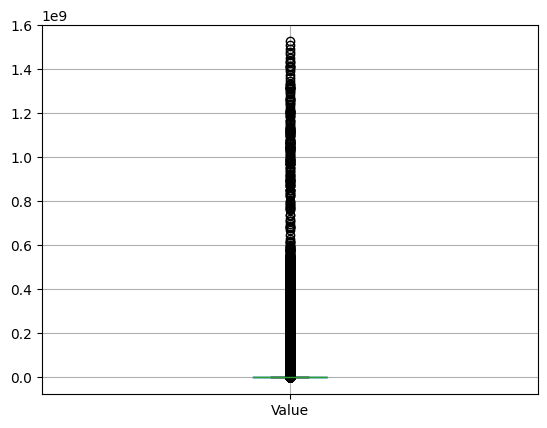

In [106]:
value_df = value_df.to_frame()
value_boxplot = value_df.boxplot()
plt.show()



In [107]:
# checking if there is any rows that is not "stocks", it is not, therefore we delete
stocks_df = live_df[live_df['Element'] != 'Stocks']
stocks_df.head()

,Area,Item,Element,Year,Unit,Value


In [108]:
distinct_country_count = live_df['Area'].nunique()
print(f'Distinct countries: {distinct_country_count}')

Distinct countries: 243


### Retter opp tilbakemeldinger om IQR. 


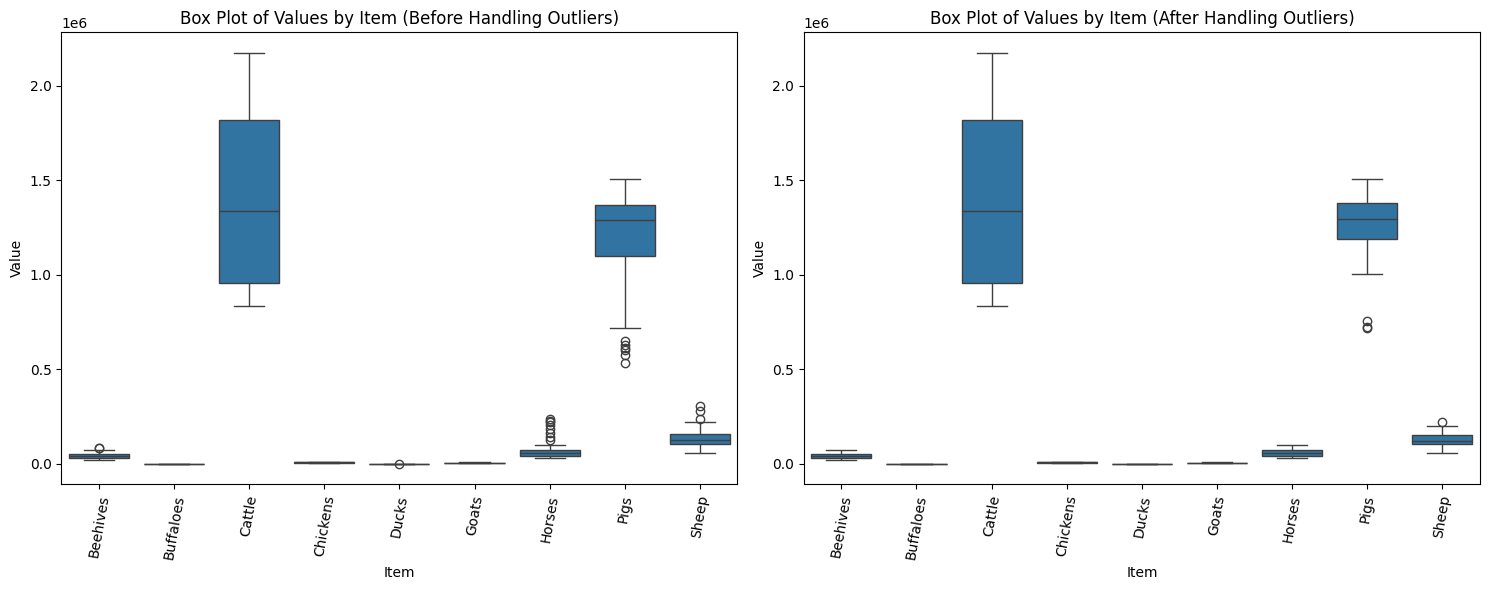

57


In [109]:
# Load the CSV file and filter to include only rows for Finland
df = pd.read_csv('live1.csv')
df = df[df['Area'] == 'Finland']

# Create a new DataFrame to hold data after outlier removal
df_no_outliers = pd.DataFrame()

# Calculate outliers for each Item separately
for item in df['Item'].unique():
    item_df = df[df['Item'] == item]  # Filter rows for each Item
    
    # Calculate IQR for the current item
    Q1 = item_df['Value'].quantile(0.25)
    Q3 = item_df['Value'].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds for outliers
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Filter out the outliers for the current item and append to the new DataFrame
    item_df_no_outliers = item_df[(item_df['Value'] >= lower_bound) & (item_df['Value'] <= upper_bound)]
    numberofoutliers = len(item_df_no_outliers)
    df_no_outliers = pd.concat([df_no_outliers, item_df_no_outliers])

# Plotting side-by-side box plots
plt.figure(figsize=(15, 6))

# Box plot before handling outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='Item', y='Value', data=df)
plt.xticks(rotation=80)
plt.title("Box Plot of Values by Item (Before Handling Outliers)")

# Box plot after handling outliers (per-item basis)
plt.subplot(1, 2, 2)
sns.boxplot(x='Item', y='Value', data=df_no_outliers)
plt.xticks(rotation=80)
plt.title("Box Plot of Values by Item (After Handling Outliers)")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

print(numberofoutliers)




# (Live) Encoding, splitting data in test/train and PCA

In [110]:
mask = live_df['Unit'] == '1000 Head'  
live_df.loc[mask, 'Value'] = live_df.loc[mask, 'Value'] * 1000  
live_df.loc[mask, 'Unit'] = 'Head' 

In [128]:
le = LabelEncoder()

# Get categorical column names
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the categorical column names
print("Categorical columns:", categorical_cols)


live_df['Item'] = le.fit_transform(live_df['Item'])
#live_df['Year'] = le.fit_transform(live_df['Year'])
live_df['Area'] = le.fit_transform(live_df['Area'])
live_df['Element'] = le.fit_transform(live_df['Element'])
live_df['Unit'] = le.fit_transform(live_df['Unit'])
#live_df = live_df[['Area','Item', 'Year', 'Value']]

display(live_df)

Categorical columns: ['Area', 'Item', 'Element', 'Unit']


,Area,Item,Element,Year,Unit,Value
0,0,0,0,1961,0,0.000039
1,0,0,0,1962,0,0.000026
2,0,0,0,1963,0,0.000030
3,0,0,0,1964,0,0.000035
4,0,0,0,1965,0,0.000039
...,...,...,...,...,...,...
122453,147,13,0,2016,0,0.010957
122454,147,13,0,2017,0,0.011174
122455,147,13,0,2018,0,0.011352
122456,147,13,0,2019,0,0.011974


In [129]:
specific_rows = live_df.iloc[[2000, 70000]]
print(specific_rows)

       Area  Item  Element  Year  Unit         Value
2000      5     0        0  1981     0  1.474325e-07
70000   171     0        0  2003     0  7.823552e-07


In [135]:
# Initialize the scaler
scaler = MinMaxScaler()

# Define columns to scale, including 'Year'
columns_to_scale = ['Value', 'Year']
live_df[columns_to_scale] = scaler.fit_transform(live_df[columns_to_scale])

# Drop 'Element' and 'Unit' columns
#live_df = live_df.drop(columns=['Element', 'Unit'])

# Display the updated DataFrame
display(live_df)


,Area,Item,Year,Value
0,0,0,0.000000,0.000039
1,0,0,0.016949,0.000026
2,0,0,0.033898,0.000030
3,0,0,0.050847,0.000035
4,0,0,0.067797,0.000039
...,...,...,...,...
122453,147,13,0.932203,0.010957
122454,147,13,0.949153,0.011174
122455,147,13,0.966102,0.011352
122456,147,13,0.983051,0.011974


In [114]:
live_df.corr()

,Area,Item,Element,Year,Unit,Value
Area,1.000000,-0.013795,NaN,-0.002316,0.008808,0.007520
Item,-0.013795,1.000000,NaN,-0.001750,-0.400549,-0.020679
Element,NaN,NaN,NaN,NaN,NaN,NaN
Year,-0.002316,-0.001750,NaN,1.000000,0.005008,0.041382
Unit,0.008808,-0.400549,NaN,0.005008,1.000000,-0.023876
Value,0.007520,-0.020679,NaN,0.041382,-0.023876,1.000000


In [115]:
# Define X (features) and y (target)
X = live_df[['Area', 'Item', 'Year']]  # Features
y = live_df['Value']                    # Target: Value

# Create training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Apply MinMaxScaler to scale the dataset
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA()  # Optionally set n_components if needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Output the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.35427701 0.32418213 0.32154085]


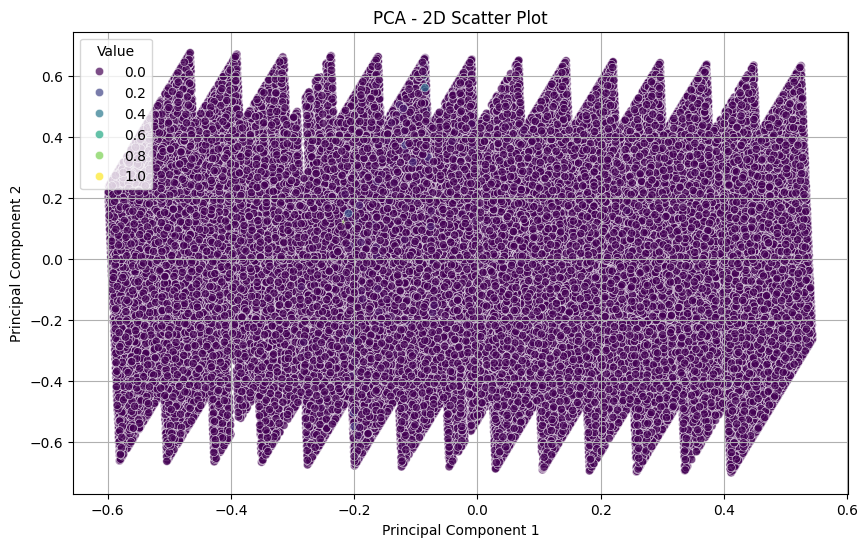

In [116]:
# Perform PCA and reduce to 2 components
pca = PCA(n_components=2)  # Set n_components to 2 to reduce dimensions
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a DataFrame for the PCA results with only two components
pca_df = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])

# Add target variable for coloring
pca_df['Value'] = y_train.values  # Assuming y_train is your target variable

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Value', palette='viridis', alpha=0.7)
plt.title('PCA - 2D Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Value')
plt.grid()
plt.show()



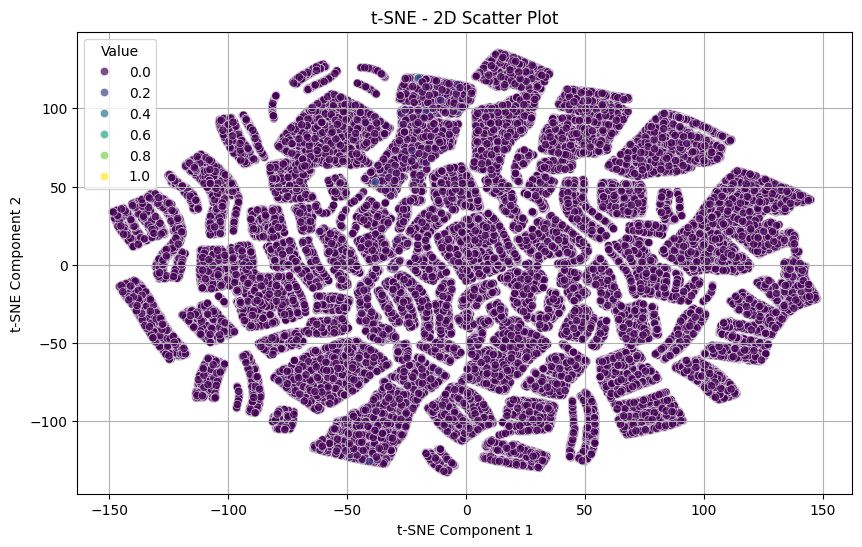

In [117]:

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = live_df[['Area', 'Item', 'Year']]  # Features
y = live_df['Value']                    # Target: Value

# Create training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Apply MinMaxScaler to scale the dataset
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=1)  # Set n_components to 2 for 2D visualization
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=X_train_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Value'] = y_train.values  # Assuming y_train is your target variable

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Value', palette='viridis', alpha=0.7)
plt.title('t-SNE - 2D Scatter Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Value')
plt.grid()
plt.show()


Whether to use PCA (Principal Component Analysis) on your dataset depends on the specific goals of your analysis and the characteristics of your data. Let's break down the dataset you provided and consider the implications for PCA:

### Dataset Overview
Your dataset includes the following columns:
- **Area**: Categorical variable representing the geographic region or country.
- **Item**: Categorical variable indicating the type of item (could represent food items or other commodities).
- **Year**: Numeric variable representing time.
- **Value**: Numeric variable representing some measure (likely a quantity, rate, or value related to the item).

### Considerations for Using PCA

1. **Nature of the Data**:
   - PCA is primarily effective for numerical data and is used to find patterns and reduce dimensionality in high-dimensional datasets. 
   - In your dataset, the categorical columns (Area and Item) will need to be encoded (e.g., using one-hot encoding) to be suitable for PCA. The **Year** and **Value** columns can be used directly since they are numeric.

2. **Dimensionality**:
   - If your dataset has a small number of numerical features (for example, just `Year` and `Value`), the benefit of applying PCA diminishes. PCA is more beneficial when you have a larger number of features that can be reduced while retaining significant variance.
   - Given that the primary numerical features in this dataset are `Year` and `Value`, PCA may not provide substantial benefits as you are working with only two numeric features after potentially encoding the categorical ones.

3. **Correlation of Features**:
   - PCA is particularly useful when you have correlated features and want to reduce multicollinearity. If `Year` and `Value` are not correlated (or not correlated with the newly created features from `Area` and `Item`), PCA may not be necessary.
   - Analyzing the correlation matrix between features before applying PCA can help you decide if it's worthwhile.

4. **Interpretability**:
   - One of the downsides of PCA is that it transforms the original features into principal components that are linear combinations of the original features, making interpretation more challenging.
   - If your goal is to maintain interpretability (especially in a dataset involving geographical and economic factors), PCA might complicate that.

5. **Goal of Analysis**:
   - If your primary goal is to visualize the data or understand patterns within the `Value` variable across different years and items, PCA could provide some insights, but other techniques such as clustering or regression analysis might be more appropriate.
   - If you are looking to predict `Value` based on `Area`, `Item`, and `Year`, other regression techniques or models may provide clearer paths to insight without requiring PCA.

### Potential Benefits of PCA in This Dataset
If you decide to apply PCA, here are potential benefits:
- **Data Visualization**: If you create a feature set by encoding `Area` and `Item`, PCA could help visualize the dataset in fewer dimensions (2D or 3D), making it easier to identify patterns or clusters.
- **Feature Reduction**: If the encoded features result in a high-dimensional space, PCA could help reduce that dimensionality while retaining variance, improving computational efficiency.

### Conclusion
In summary, while it is possible to apply PCA to your dataset after appropriate preprocessing, the actual benefits may be limited given the nature of your features. It may not provide significant insights due to the relatively low dimensionality and potential lack of correlation among features. Instead, consider your goals: if you're interested in predictive modeling, visualization, or exploring relationships in your data, other methods (like regression analysis, clustering, or simpler visualizations) may be more suitable. However, if you do have a high-dimensional feature set after encoding, PCA might still be worth exploring.

# (Finland) Encoding, splitting and PCA

In [118]:
finland_df = live_df[live_df['Area'] == 'Finland']
finland_df.head()

,Area,Item,Element,Year,Unit,Value


In [119]:
finland_df = finland_df[['Area','Item', 'Year', 'Value']]


display(finland_df)

,Area,Item,Year,Value


In [120]:
finland_df = finland_df[finland_df['Item'] != 'Chickens']

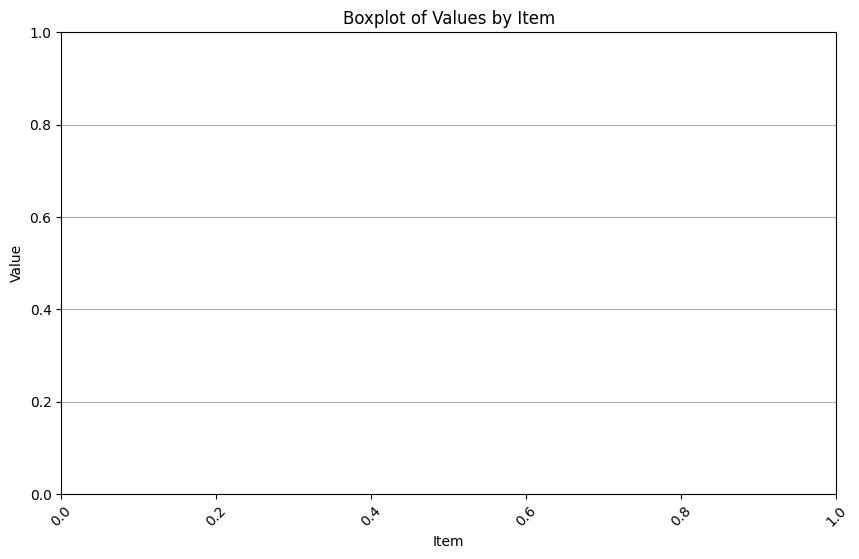

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item', y='Value', data=finland_df)

# Customize the plot
plt.title('Boxplot of Values by Item')
plt.xlabel('Item')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

In [122]:
finland_df = finland_df[finland_df['Year'] >= 1970]

display(finland_df)

,Area,Item,Year,Value


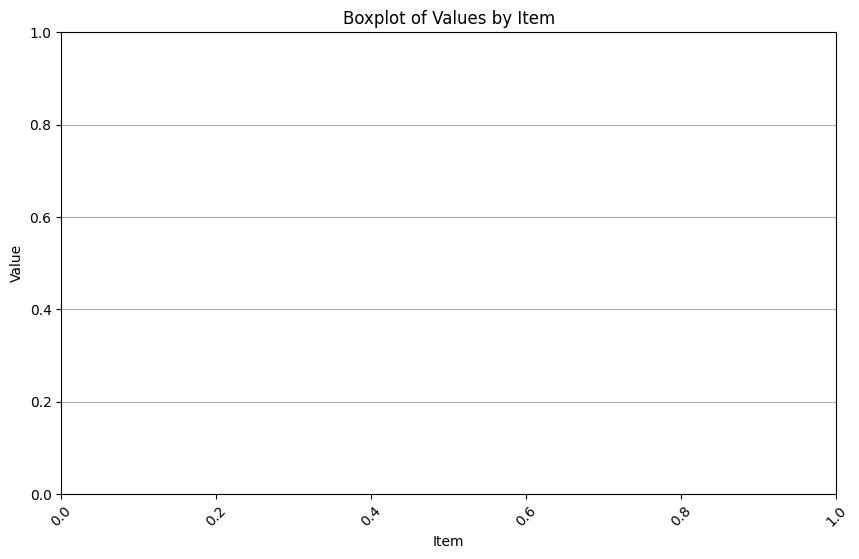

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item', y='Value', data=finland_df)

# Customize the plot
plt.title('Boxplot of Values by Item')
plt.xlabel('Item')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

In [124]:
finland_df['Item'].nunique()

0

In [125]:
le = LabelEncoder()


finland_df['Item_Encoded'] = le.fit_transform(finland_df['Item'])
finland_df['Year'] = le.fit_transform(finland_df['Year'])
display(finland_df)

,Area,Item,Year,Value,Item_Encoded


In [126]:
finland_df = finland_df[['Item_Encoded', 'Year', 'Value']]
finland_df.rename(columns={'Item_Encoded': 'Item'}, inplace=True)

display(finland_df)

,Item,Year,Value


In [127]:
scaler = MinMaxScaler()
columns_to_scale = ['Value']
finland_df[columns_to_scale] = scaler.fit_transform(finland_df[columns_to_scale])

display(finland_df)


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

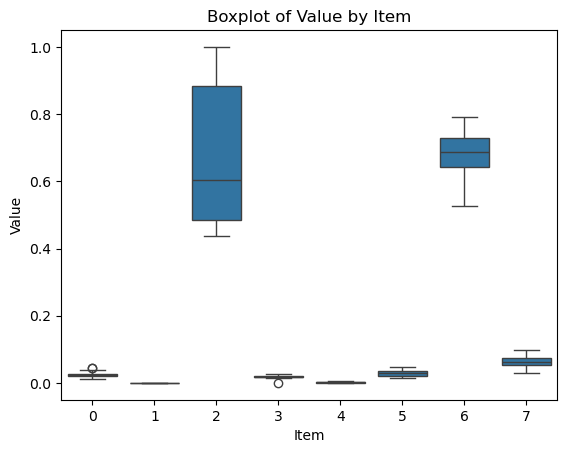

In [ ]:
sns.boxplot(x='Item', y='Value', data=finland_df)


plt.title('Boxplot of Value by Item')
plt.xlabel('Item')
plt.ylabel('Value')


plt.show()

In [ ]:
# Define X (features) and y (target)
X = finland_df[['Item', 'Year']]  # Features: Item, Year
y = finland_df['Value']           # Target: Value

# Create training / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Apply MinMaxScaler to scale the dataset
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA()  # Optionally set n_components to reduce dimensions, e.g., PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Output the explained variance ratio to understand how much variance is explained by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.58543394 0.41456606]
